In [1]:
import pandas as pd
import nltk
import sklearn
import textblob
from textblob import TextBlob
import matplotlib
import seaborn

In [2]:
dataset=pd.read_csv("C:/Users/Merry/Desktop/sample/sample/tweetss.csv",encoding="latin-1")

In [3]:
dataset.head()

,tweets,sex,Sex,symptom,type,level,Level
0,Do You Think You Might Be Going Insane Again?,F,1,1,1,2,Severe
1,The Day My Heart Broke  Part Two,F,1,1,3,2,Severe
2,New #blog post alert! I discuss depression and...,F,1,1,3,2,Severe
3,Bipolar Disorder  My Super Power,F,1,1,2,2,Severe
4,Finally its Christmas drink season @starbucks...,F,1,0,0,1,none


In [4]:
dataset['tweets']=dataset.tweets.astype(str)

In [5]:
dataset['polarity']=dataset['tweets'].apply(lambda tweet:TextBlob(tweet).sentiment.polarity)

In [6]:
dataset['subjectivity']=dataset['tweets'].apply(lambda tweet:TextBlob(tweet).sentiment.subjectivity)


In [7]:
dataset.head()

,tweets,sex,Sex,symptom,type,level,Level,polarity,subjectivity
0,Do You Think You Might Be Going Insane Again?,F,1,1,1,2,Severe,-1.000000,1.000000
1,The Day My Heart Broke  Part Two,F,1,1,3,2,Severe,0.000000,0.000000
2,New #blog post alert! I discuss depression and...,F,1,1,3,2,Severe,-0.132792,0.622078
3,Bipolar Disorder  My Super Power,F,1,1,2,2,Severe,0.333333,0.666667
4,Finally its Christmas drink season @starbucks...,F,1,0,0,1,none,0.000000,1.000000


In [8]:
#import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
matplotlib.style.use('ggplot')
from subprocess import check_output
from nltk.tokenize import ToktokTokenizer
toktok=ToktokTokenizer()

In [9]:
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
df=dataset
df.head()
df.tail()

,tweets,sex,Sex,symptom,type,level,Level,polarity,subjectivity
3994,I guess I'm gonna travel. Just fearful (very f...,F,1,1,2,2,Severe,-0.680000,0.773333
3995,RT @halsey : No jokes right now. I have dedica...,F,1,1,2,2,Severe,0.142857,0.417857
3996,Do yourselves a favor... dont EVER date a per...,F,1,1,2,2,Severe,0.468750,0.800000
3997,"@LCNSB_ I'm sorry, because I suffer from sever...",F,1,1,2,2,Severe,-0.400000,0.638889
3998,RT @StrugglingAnon_ : Honestly I am so fucking...,F,1,1,2,0,Highly severe,0.200000,0.500000


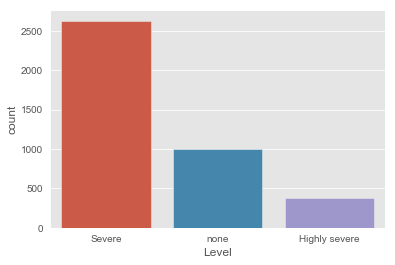

In [11]:
# Value Count 
sns.countplot(df['Level'])

In [12]:
import re
def initial_clean(tweets):
    """
    Function to clear text of websites,email addresses and any punctuation
    We also lower case the text
    """
    tweets=re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)"," ",tweets)
    tweets=re.sub("[^a-zA-Z]"," ",tweets)
    tweets=tweets.lower()
    #text=nltk.word_tokenize(text)
    tweets=toktok.tokenize(tweets)
    return tweets
#stop_words=stopwords.words('english')
'''
def remove_stop_words(tweets):
    
    Function that removes all stopwords from text
    
    return [word for word in message if word not in stop_words] '''
stemmer=PorterStemmer()
def stem_words(tweets):  
    '''
    Function to stem words so that plural and singular are treated the same
    '''
    try:
        tweets=[stemmer.stem(word) for word in tweets]
        tweets=[word for word in tweets if len(word)>1] #make sure we have no 1 letter words
    except IndexError: #the word 'oed' broke this,so needed try except
        pass
    return tweets
def apply_all(tweets):
    '''
    This function applies all the function above into one  remove_stop_words
    '''
    
    return stem_words(initial_clean(tweets))


In [13]:
#clean message and tweets and create new column 'tokenized'
import time
t1=time.time()
df['tokenized']=df['tweets'].apply(apply_all) + df['tweets'].apply(apply_all)
t2=time.time()
print("Time to clean and tokenize",len(df),"articles: ",(t2-t1)/60,"min")


Time to clean and tokenize 3999 articles:  0.4149043957392375 min


In [14]:
tokens=[]
for i in range(0,len(df)):
    k=df['tokenized'][i]
    tokens.append(k)

In [15]:
tokens[0]

['do',
 'you',
 'think',
 'you',
 'might',
 'be',
 'go',
 'insan',
 'again',
 'do',
 'you',
 'think',
 'you',
 'might',
 'be',
 'go',
 'insan',
 'again']

In [16]:
df.dtypes

tweets           object
sex              object
Sex               int64
symptom           int64
type              int64
level             int64
Level            object
polarity        float64
subjectivity    float64
tokenized        object
dtype: object

In [17]:
k=df[['Sex','polarity','subjectivity','symptom','type']].values

In [18]:
y=df[['Level']]

In [19]:
feature_size=150
window_context=10
min_word_count=2
sample=1e-3

In [20]:
from gensim.models import word2vec  
from gensim.models.word2vec import Word2Vec
w2v_model=word2vec.Word2Vec(tokens,size=feature_size,window=window_context,min_count=min_word_count,sample=sample,iter=50)
similar_words={search_term:[item[0] for item in w2v_model.wv.most_similar([search_term],topn=5)]
              for search_term in['broke','hate']}

In [21]:
similar_words

{'broke': ['girlfriend', 'philli', 'cheat', 'fridayfun', 'purton'],
 'hate': ['snow', 'corner', 'inch', 'minimum', 'disgust']}

In [22]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector=np.zeros((num_features,),dtype="float64")
    nwords=0.
    
    for word in words:
        if word in vocabulary:
            nwords=nwords+1.
            feature_vector=np.add(feature_vector,model[word])
            
    if nwords:
        feature_vector=np.divide(feature_vector, nwords)
    
    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary=set(model.wv.index2word)
    features=[average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
             for tokenized_sentence in corpus]
    return np.array(features)


x=averaged_word_vectorizer(corpus=tokens, model=w2v_model, num_features=feature_size )
df=pd.DataFrame(x)

C:\Users\Merry\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [23]:
print(x)

[[-0.08972651 -0.65278154 -0.65253806 ... -0.41986781  0.53966369
   0.66512836]
 [-0.59630312 -0.24837038 -0.25404803 ...  0.51434422  0.43720396
   0.25315571]
 [-0.11276089  0.23830868 -0.44219604 ...  0.30167651  0.11243328
  -0.64706491]
 ...
 [-0.49336959 -0.26614715  0.08478456 ...  0.4454169   0.44978243
   0.23284777]
 [-0.51011181  0.44162823  0.3158748  ...  0.53941343  0.12314026
  -0.52473666]
 [-0.18105639  0.16490043  0.52378882 ...  0.1222469   0.23152932
   1.06472062]]


In [ ]:
len(df)

In [24]:
x=pd.DataFrame(np.array(x))
#k=df[['Sex','polarity','subjectivity','symptom','type']].values
p=pd.DataFrame(np.array(k))
X=pd.concat([x,p],axis=1)
#x_feature.shape
X

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,0,1,2,3,4
0,-0.089727,-0.652782,-0.652538,-0.153685,0.121310,0.436303,0.039620,-0.371489,0.199679,0.567823,...,-0.109292,0.306321,-0.419868,0.539664,0.665128,1.0,-1.000000,1.000000,1.0,1.0
1,-0.596303,-0.248370,-0.254048,-0.694403,0.003840,-0.029907,-0.596812,-0.391281,0.966576,0.566199,...,-0.559503,-0.707548,0.514344,0.437204,0.253156,1.0,0.000000,0.000000,1.0,3.0
2,-0.112761,0.238309,-0.442196,-0.458075,-0.221361,0.396485,-0.156560,-0.167615,0.267032,-0.452189,...,-0.150706,0.205772,0.301677,0.112433,-0.647065,1.0,-0.132792,0.622078,1.0,3.0
3,-0.631046,0.099081,-0.751429,-0.050302,1.087678,-0.188018,0.993231,1.401854,0.129477,-0.953011,...,0.693446,-0.266047,0.685437,0.214330,-0.523209,1.0,0.333333,0.666667,1.0,2.0
4,-0.354469,0.047809,-0.481502,0.091825,0.092744,0.232228,0.262409,-0.198860,0.967236,-1.015153,...,-0.112641,0.127150,-0.034645,-0.031139,-0.640081,1.0,0.000000,1.000000,0.0,0.0
5,-0.096316,-0.312419,0.712465,-0.304614,-0.085442,0.146757,-0.147017,0.044034,-0.652008,0.657360,...,-0.024090,0.023686,-0.059590,-0.403523,-1.033804,1.0,0.000000,0.000000,1.0,2.0
6,-0.210541,0.075702,-0.358174,-0.035275,-0.006217,0.426867,-0.073790,-0.205844,0.100874,-0.605559,...,-0.255146,-0.076386,0.287309,-0.223151,-0.309996,1.0,0.400000,0.450000,1.0,2.0
7,0.130331,1.139256,-0.453984,0.099410,0.175848,0.201570,0.086101,1.429645,-0.149160,-1.233544,...,0.033528,-0.094271,0.336885,0.806568,0.205143,1.0,0.000000,0.000000,1.0,1.0
8,-0.118494,0.334837,-0.242596,-0.198566,-0.400743,-0.119476,0.034740,0.995880,-0.333052,-0.738787,...,-0.529907,0.010585,0.590344,0.644608,-0.011304,1.0,0.200000,0.300000,1.0,1.0
9,-0.660153,-0.105786,-0.608029,0.086331,0.460542,0.131800,0.228321,0.565615,-0.075463,-0.075531,...,0.167103,0.255596,0.732752,0.779122,-0.548136,1.0,0.000000,0.000000,1.0,2.0


In [25]:
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB


In [26]:
from sklearn import metrics
import numpy as np
import itertools

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
from sklearn.model_selection import StratifiedKFold

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=400, n_jobs=4)
accuracy3=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    print("train:", train_index ,"Validation:",test_index)
    x1_train, x1_test=X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test=y.iloc[train_index], y.iloc[test_index]
    Random.fit(x1_train,np.ravel(y1_train))
    pred = Random.predict(x1_test)
    score =accuracy_score(pred, y1_test)
    accuracy3.append(score)

print(accuracy3)

train: [ 369  371  377 ... 3996 3997 3998] Validation: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  

train: [   0    1    2 ... 3996 3997 3998] Validation: [1096 1099 1105 1107 1108 1109 1110 1114 1116 1117 1121 1122 1127 1128
 1131 1132 1134 1137 1142 1143 1153 1156 1157 1158 1159 1161 1163 1164
 1166 1167 1168 1172 1174 1175 1176 1178 1180 1181 1183 1184 1187 1188
 1189 1192 1193 1194 1195 1196 1198 1199 1200 1202 1204 1206 1207 1208
 1210 1211 1212 1213 1216 1217 1218 1219 1221 1222 1223 1224 1225 1227
 1228 1229 1230 1231 1233 1234 1237 1238 1239 1241 1242 1243 1244 1248
 1249 1251 1252 1253 1257 1258 1260 1262 1263 1267 1269 1270 1271 1273
 1274 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855 1856
 1857 1858 1859 1860 1861 1862 1863 1864 1865 1867 1868 1869 1870 1871
 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885
 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1922 1923 1924 1925 1926 1927 1928
 1929 1930 1931 1932 1

train: [   0    1    2 ... 3996 3997 3998] Validation: [2332 2333 2334 2335 2336 2337 2338 2339 2341 2343 2344 2345 2347 2348
 2351 2352 2353 2354 2355 2358 2360 2361 2362 2363 2364 2366 2367 2368
 2371 2375 2376 2377 2379 2380 2381 2382 2383 2385 2387 2388 2389 2390
 2391 2394 2395 2396 2397 2398 2400 2401 2402 2403 2404 2405 2406 2411
 2412 2414 2415 2416 2417 2418 2419 2420 2421 2423 2424 2425 2426 2427
 2430 2433 2437 2438 2439 2440 2442 2443 2444 2445 2446 2447 2449 2450
 2451 2452 2455 2457 2458 2460 2462 2463 2464 2465 2466 2467 2468 2470
 2471 3357 3358 3359 3360 3361 3362 3363 3364 3365 3366 3367 3368 3369
 3370 3371 3372 3373 3374 3375 3376 3377 3378 3379 3380 3381 3382 3383
 3384 3385 3386 3387 3388 3389 3390 3391 3392 3393 3394 3395 3396 3397
 3398 3399 3400 3401 3402 3403 3404 3405 3406 3408 3409 3410 3411 3412
 3413 3414 3415 3416 3417 3418 3419 3420 3421 3422 3423 3424 3425 3426
 3427 3428 3429 3430 3431 3432 3433 3434 3435 3436 3437 3438 3439 3440
 3441 3442 3443 3444 3

In [45]:
np.array(accuracy3).mean()

0.9362406015037592

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import  LogisticRegression
logreg=LogisticRegression(C=1e5, max_iter=10000 )
accuracy2=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    print("train:", train_index ,"Validation:",test_index)
    #scaled_inputs_all.iloc[shuffled_indices].values
    x1_train, x1_test=X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test=y.iloc[train_index], y.iloc[test_index]
    
    logreg.fit(x1_train,np.ravel(y1_train))
    pred = logreg.predict(x1_test)
    score =accuracy_score(pred, y1_test)
    accuracy2.append(score)

print(accuracy2)

train: [ 369  371  377 ... 3996 3997 3998] Validation: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  

train: [   0    1    2 ... 3996 3997 3998] Validation: [1096 1099 1105 1107 1108 1109 1110 1114 1116 1117 1121 1122 1127 1128
 1131 1132 1134 1137 1142 1143 1153 1156 1157 1158 1159 1161 1163 1164
 1166 1167 1168 1172 1174 1175 1176 1178 1180 1181 1183 1184 1187 1188
 1189 1192 1193 1194 1195 1196 1198 1199 1200 1202 1204 1206 1207 1208
 1210 1211 1212 1213 1216 1217 1218 1219 1221 1222 1223 1224 1225 1227
 1228 1229 1230 1231 1233 1234 1237 1238 1239 1241 1242 1243 1244 1248
 1249 1251 1252 1253 1257 1258 1260 1262 1263 1267 1269 1270 1271 1273
 1274 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855 1856
 1857 1858 1859 1860 1861 1862 1863 1864 1865 1867 1868 1869 1870 1871
 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885
 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1922 1923 1924 1925 1926 1927 1928
 1929 1930 1931 1932 1

train: [   0    1    2 ... 3996 3997 3998] Validation: [2332 2333 2334 2335 2336 2337 2338 2339 2341 2343 2344 2345 2347 2348
 2351 2352 2353 2354 2355 2358 2360 2361 2362 2363 2364 2366 2367 2368
 2371 2375 2376 2377 2379 2380 2381 2382 2383 2385 2387 2388 2389 2390
 2391 2394 2395 2396 2397 2398 2400 2401 2402 2403 2404 2405 2406 2411
 2412 2414 2415 2416 2417 2418 2419 2420 2421 2423 2424 2425 2426 2427
 2430 2433 2437 2438 2439 2440 2442 2443 2444 2445 2446 2447 2449 2450
 2451 2452 2455 2457 2458 2460 2462 2463 2464 2465 2466 2467 2468 2470
 2471 3357 3358 3359 3360 3361 3362 3363 3364 3365 3366 3367 3368 3369
 3370 3371 3372 3373 3374 3375 3376 3377 3378 3379 3380 3381 3382 3383
 3384 3385 3386 3387 3388 3389 3390 3391 3392 3393 3394 3395 3396 3397
 3398 3399 3400 3401 3402 3403 3404 3405 3406 3408 3409 3410 3411 3412
 3413 3414 3415 3416 3417 3418 3419 3420 3421 3422 3423 3424 3425 3426
 3427 3428 3429 3430 3431 3432 3433 3434 3435 3436 3437 3438 3439 3440
 3441 3442 3443 3444 3

In [62]:
np.array(accuracy2).mean()

0.9424912280701756

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
svmmodel= LinearSVC(C=1, multi_class='ovr', max_iter=10000, 
                        class_weight='balanced',penalty='l2' )
accuracy1=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    print("train:", train_index ,"Validation:",test_index)
    #scaled_inputs_all.iloc[shuffled_indices].values
    x1_train, x1_test=X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test=y.iloc[train_index], y.iloc[test_index]
    
    svmmodel.fit(x1_train,np.ravel(y1_train))
    pred = svmmodel.predict(x1_test)
    score =accuracy_score(pred, y1_test)
    accuracy1.append(score)

print(accuracy1)

train: [ 369  371  377 ... 3996 3997 3998] Validation: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  

train: [   0    1    2 ... 3996 3997 3998] Validation: [1096 1099 1105 1107 1108 1109 1110 1114 1116 1117 1121 1122 1127 1128
 1131 1132 1134 1137 1142 1143 1153 1156 1157 1158 1159 1161 1163 1164
 1166 1167 1168 1172 1174 1175 1176 1178 1180 1181 1183 1184 1187 1188
 1189 1192 1193 1194 1195 1196 1198 1199 1200 1202 1204 1206 1207 1208
 1210 1211 1212 1213 1216 1217 1218 1219 1221 1222 1223 1224 1225 1227
 1228 1229 1230 1231 1233 1234 1237 1238 1239 1241 1242 1243 1244 1248
 1249 1251 1252 1253 1257 1258 1260 1262 1263 1267 1269 1270 1271 1273
 1274 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855 1856
 1857 1858 1859 1860 1861 1862 1863 1864 1865 1867 1868 1869 1870 1871
 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885
 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1922 1923 1924 1925 1926 1927 1928
 1929 1930 1931 1932 1

train: [   0    1    2 ... 3996 3997 3998] Validation: [2332 2333 2334 2335 2336 2337 2338 2339 2341 2343 2344 2345 2347 2348
 2351 2352 2353 2354 2355 2358 2360 2361 2362 2363 2364 2366 2367 2368
 2371 2375 2376 2377 2379 2380 2381 2382 2383 2385 2387 2388 2389 2390
 2391 2394 2395 2396 2397 2398 2400 2401 2402 2403 2404 2405 2406 2411
 2412 2414 2415 2416 2417 2418 2419 2420 2421 2423 2424 2425 2426 2427
 2430 2433 2437 2438 2439 2440 2442 2443 2444 2445 2446 2447 2449 2450
 2451 2452 2455 2457 2458 2460 2462 2463 2464 2465 2466 2467 2468 2470
 2471 3357 3358 3359 3360 3361 3362 3363 3364 3365 3366 3367 3368 3369
 3370 3371 3372 3373 3374 3375 3376 3377 3378 3379 3380 3381 3382 3383
 3384 3385 3386 3387 3388 3389 3390 3391 3392 3393 3394 3395 3396 3397
 3398 3399 3400 3401 3402 3403 3404 3405 3406 3408 3409 3410 3411 3412
 3413 3414 3415 3416 3417 3418 3419 3420 3421 3422 3423 3424 3425 3426
 3427 3428 3429 3430 3431 3432 3433 3434 3435 3436 3437 3438 3439 3440
 3441 3442 3443 3444 3

In [64]:
np.array(accuracy1).mean()

0.9384956140350876

In [65]:
from sklearn.metrics import accuracy_score
nb_model = GaussianNB()
accuracy4=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    print("train:", train_index ,"Validation:",test_index)
    #scaled_inputs_all.iloc[shuffled_indices].values
    x1_train, x1_test=X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test=y.iloc[train_index], y.iloc[test_index]
    
    nb_model.fit(x1_train,np.ravel(y1_train))
    pred = nb_model.predict(x1_test)
    score =accuracy_score(pred, y1_test)
    accuracy4.append(score)

print(accuracy4)

train: [ 369  371  377 ... 3996 3997 3998] Validation: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  

train: [   0    1    2 ... 3996 3997 3998] Validation: [1096 1099 1105 1107 1108 1109 1110 1114 1116 1117 1121 1122 1127 1128
 1131 1132 1134 1137 1142 1143 1153 1156 1157 1158 1159 1161 1163 1164
 1166 1167 1168 1172 1174 1175 1176 1178 1180 1181 1183 1184 1187 1188
 1189 1192 1193 1194 1195 1196 1198 1199 1200 1202 1204 1206 1207 1208
 1210 1211 1212 1213 1216 1217 1218 1219 1221 1222 1223 1224 1225 1227
 1228 1229 1230 1231 1233 1234 1237 1238 1239 1241 1242 1243 1244 1248
 1249 1251 1252 1253 1257 1258 1260 1262 1263 1267 1269 1270 1271 1273
 1274 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855 1856
 1857 1858 1859 1860 1861 1862 1863 1864 1865 1867 1868 1869 1870 1871
 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885
 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1922 1923 1924 1925 1926 1927 1928
 1929 1930 1931 1932 1

train: [   0    1    2 ... 3831 3832 3833] Validation: [2472 2473 2475 2476 2477 2479 2480 2481 2482 2483 2485 2486 2487 2488
 2489 2492 2493 2494 2495 2496 2497 2500 2501 2504 2505 2507 2508 2509
 2510 2511 2512 2513 2518 2519 2520 2525 2527 2528 2530 2539 2561 2562
 2564 2565 2568 2570 2571 2572 2574 2575 2578 2579 2580 2581 2582 2585
 2587 2588 2589 2590 2591 2593 2594 2595 2598 2602 2603 2604 2606 2607
 2608 2609 2610 2612 2614 2615 2616 2617 2618 2622 2623 2624 2629 2630
 2635 2638 2645 2647 2649 2650 2652 2653 2654 2657 2658 2659 2660 2661
 2663 2666 3622 3623 3624 3625 3626 3627 3628 3629 3634 3635 3636 3637
 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651
 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665
 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3678 3679 3680
 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694
 3695 3696 3697 3699 3700 3701 3702 3703 3704 3705 3706 3707 3708 3709
 3710 3712 3713 3714 3

In [66]:
np.array(accuracy4).mean()

0.9052399749373432